Начало выполнения разведочного анализа датасета Heart Failure Prediction Dataset. (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

Загружаем набор данных в переменную datset с помощью библиотеки pandas. 

С помощью метода head() печатаем первые 10 строк набора данных.

TODO: перенести графики лучших результатов в конец какждого алгоритма
TODO: зарефакторить код, а именно повторяющиеся блоки кода с oneHotencoder, Ordinal и тд тп перенести в отдельную функцию/или создать несколько копий X перед использованием алгоритмов, по типу X_HOT_ST - X с onehot + standrdScaler(но второй варик это кринж, лучшие в отдельной функции) (ну или оставим как есть)
TODO: попробовать поудалять некоторые слабокоррелируемые признаки и позапускать полностью код( если результат будет улучшаться то учесть это в отчете, в коде оставим только лучший варик)

In [632]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


#For regression analisys
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


df = pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Age - Возраст человека.

Sex - Пол человека.

ChestPainType - Тип боли в груди:  **TA**: Typical Angina (типичная стенокардия), **ATA**: Atypical Angina (атипичная стенокардия), **NAP**: Non-Anginal Pain (неангинальная боль), **ASY**: Asymptomatic (бессимптомная).

RestingBP - Aртериальное давление в состоянии покоя.

Cholesterol - Уровень холестерина в крови.

FastingBS - Уровень сахара в крови натощак.

RestingECG - Результаты электрокардиограммы в покое: **Norma**l: нормальная, **ST**: аномалия ST-T (инверсия T и/или элевация или депрессия ST > 0,05 мВ),  **LVH**: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса.

MaxHR - Максимальная достигнутая частота сердечных сокращений.

ExerciseAngina - Стенокардия, вызванная физической нагрузкой.

Oldpeak - Депрессия ST, вызванная физическими упражнениями относительно отдыха.

ST_Slope - Наклон сегмента ST пикового упражнения.

HeartDisease - конечный результат - есть ли у человека сердечная недостаточность.

Проведем первичное статистическое исследование исследование количественных и категориальных признаков.

Посмотрим на общую статистику числовых данных (количество, среднее значение, среднеквадратичное отклонение, минимальное и максимальное значения и тд.).

In [633]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Проанализируем нечисловые данные (количество непустых значений, количество уникальных записей, наиболее часто повторяющаяся запись, частота самой частой записи).

In [634]:
df.describe(include=['O'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


Информация о столбцах и типах значений.


In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Определим наличие пропусков в данных.

In [636]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Смотря на таблицу, можем сделать вывод, что пропусков в наборе данных нет.

In [637]:
df.duplicated().sum()

0

In [638]:
df['FastingBS'] = df['FastingBS'].astype(bool)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,False,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,False,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,False,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,False,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,False,Normal,122,N,0.0,Up,0


Дубликатов в датасете нет.

In [639]:
#вывод уникальных значений в столбце Sex
print("Unique values in column Sex:", df['Sex'].unique())

Unique values in column Sex: ['M' 'F']


In [640]:
#вывод уникальных значений в столбце ChestPainType
print("Unique values in column: ChestPainType", df['ChestPainType'].unique())

Unique values in column: ChestPainType ['ATA' 'NAP' 'ASY' 'TA']


In [641]:
#вывод уникальных значений в столбце RestingECG
print("Unique values in column: RestingECG", df['RestingECG'].unique())

Unique values in column: RestingECG ['Normal' 'ST' 'LVH']


In [642]:
#вывод уникальных значений в столбце ExerciseAngina
print("Unique values in column: ExerciseAngina", df['ExerciseAngina'].unique())

Unique values in column: ExerciseAngina ['N' 'Y']


In [643]:
#вывод уникальных значений в столбце ST_Slope
print("Unique values in column: ST_Slope", df['ST_Slope'].unique())

Unique values in column: ST_Slope ['Up' 'Flat' 'Down']


**Проверка наличия выбросов.**

<AxesSubplot: xlabel='RestingBP'>

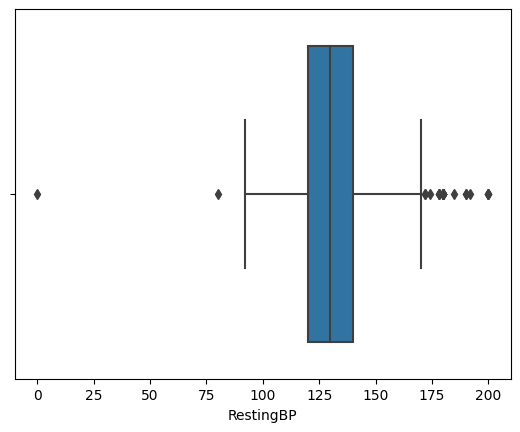

In [644]:
sns.boxplot(x=df['RestingBP'])

<AxesSubplot: xlabel='Cholesterol'>

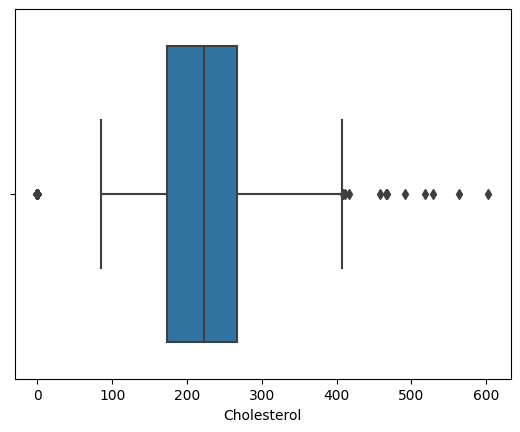

In [645]:
sns.boxplot(x=df['Cholesterol'])

<AxesSubplot: xlabel='MaxHR'>

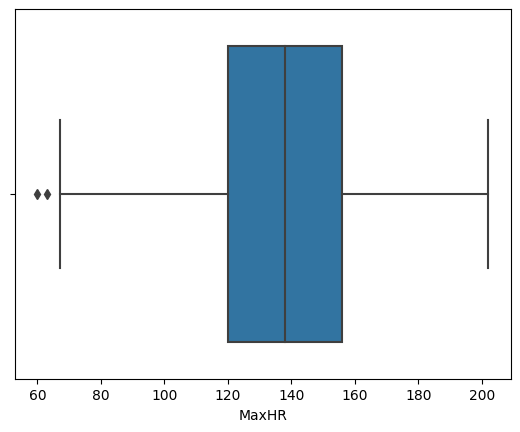

In [646]:
sns.boxplot(x=df['MaxHR'])

<AxesSubplot: xlabel='Oldpeak'>

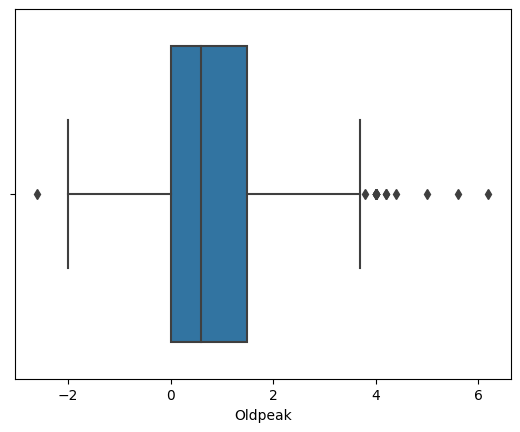

In [647]:
sns.boxplot(x=df['Oldpeak'])

Удаление выбросов.

In [648]:
for column in df.columns:
    if(df[column].dtype in [float, int]):
        
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        a = q1 - 1.2 * iqr
        b = q3 + 1.3 * iqr
        mask = (df[column] >= a) & (df[column] <= b)
        df = df[mask]

<AxesSubplot: xlabel='RestingBP'>

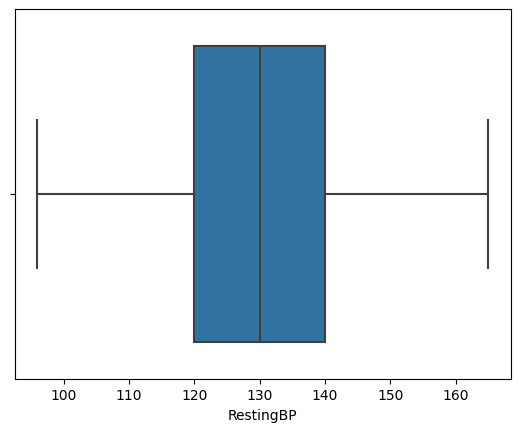

In [649]:
sns.boxplot(x=df['RestingBP'])

In [650]:
df = df[(df['Cholesterol'] >= 110) & (df['Cholesterol'] <= 380)]


<AxesSubplot: xlabel='Cholesterol'>

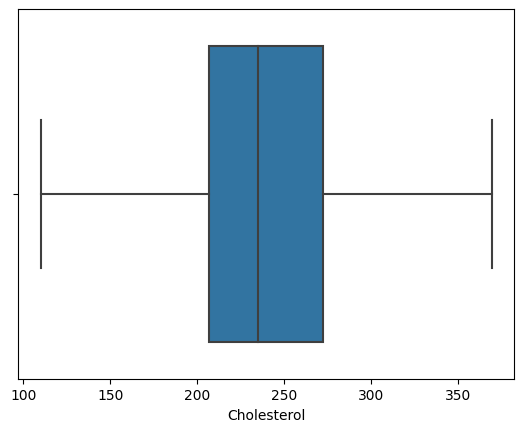

In [651]:
sns.boxplot(x=df['Cholesterol'])

In [652]:
# mask = df['MaxHR'] < 75
# result = df.loc[mask, 'MaxHR']
# print(result)

<AxesSubplot: xlabel='MaxHR'>

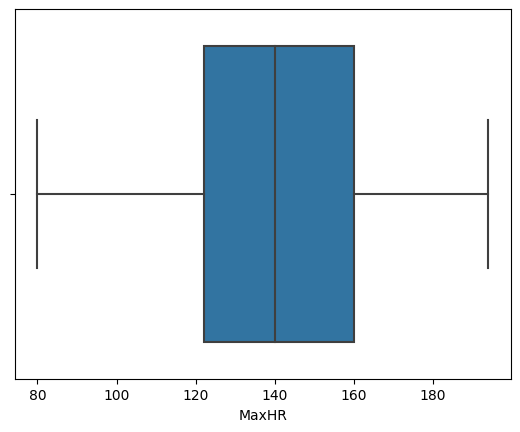

In [653]:
sns.boxplot(x=df['MaxHR'])

<AxesSubplot: xlabel='Oldpeak'>

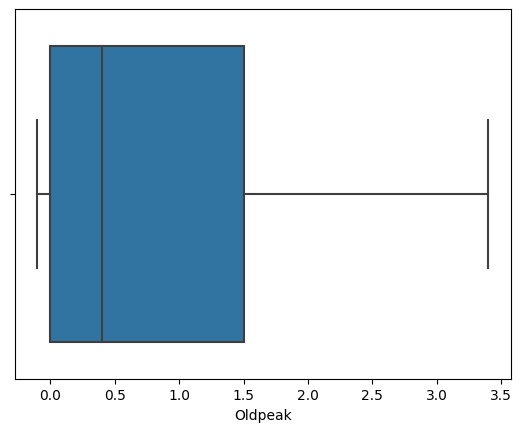

In [654]:
sns.boxplot(x=df['Oldpeak'])

In [655]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             663 non-null    int64  
 1   Sex             663 non-null    object 
 2   ChestPainType   663 non-null    object 
 3   RestingBP       663 non-null    int64  
 4   Cholesterol     663 non-null    int64  
 5   FastingBS       663 non-null    bool   
 6   RestingECG      663 non-null    object 
 7   MaxHR           663 non-null    int64  
 8   ExerciseAngina  663 non-null    object 
 9   Oldpeak         663 non-null    float64
 10  ST_Slope        663 non-null    object 
 11  HeartDisease    663 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 62.8+ KB


Тут короче универсальное удаление всех выборосов (может пригодится)
```
for column in DF.columns:
    if(DF[column].dtype in [float, int]):
        
        q1 = DF[column].quantile(0.25)
        q3 = DF[column].quantile(0.75)
        iqr = q3 - q1
        a = q1 - 1.5 * iqr
        b = q3 + 1.5 * iqr
        mask = (DF[column] >= a) & (DF[column] <= b)
        DF = DF[mask]
```



**Визуализация распределений и взаимосвязей.**

/tmp/ipykernel_5812/1072140413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

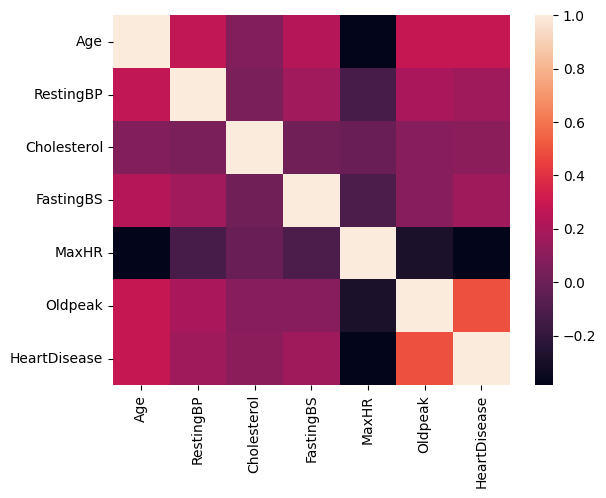

In [656]:
sns.heatmap(df.corr())


Сильно коррелирующие признаки:
MaxHR, Oldpeak, ST_slope, ExerciseAngina_

In [657]:
from sklearn.preprocessing import OrdinalEncoder
df_copy_string = df.copy()
encoder = OrdinalEncoder()
encoder.fit(df_copy_string[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])
df_copy_string[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] = encoder.transform(df_copy_string[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

<AxesSubplot: >

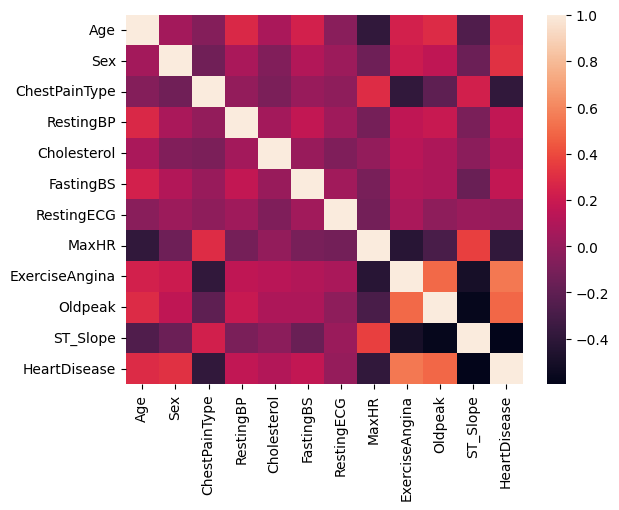

In [658]:
sns.heatmap(df_copy_string.corr())

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '(0, 7]'),
  Text(1, 0, '(7, 14]'),
  Text(2, 0, '(14, 18]'),
  Text(3, 0, '(18, 30]'),
  Text(4, 0, '(30, 45]'),
  Text(5, 0, '(45, 60]'),
  Text(6, 0, '(60, 80]')])

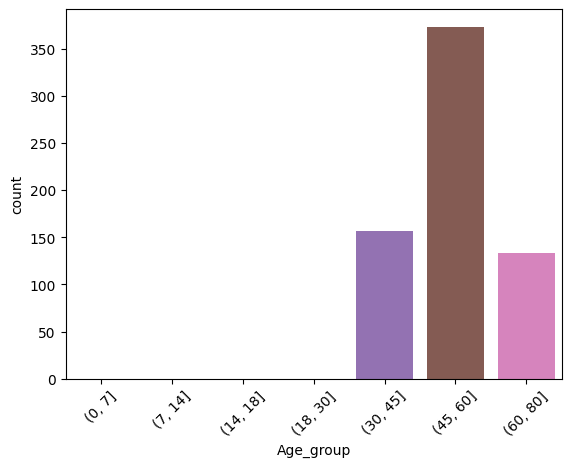

In [659]:
df['Age_group'] = pd.cut(x=df['Age'], bins=[0, 7, 14, 18, 30, 45, 60, 80]) #возраст
sns.countplot(data=df, x='Age_group')
plt.xticks(rotation=45)

/tmp/ipykernel_5812/212699890.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Age_group', y='HeartDisease', ci=None)


<AxesSubplot: xlabel='Age_group', ylabel='HeartDisease'>

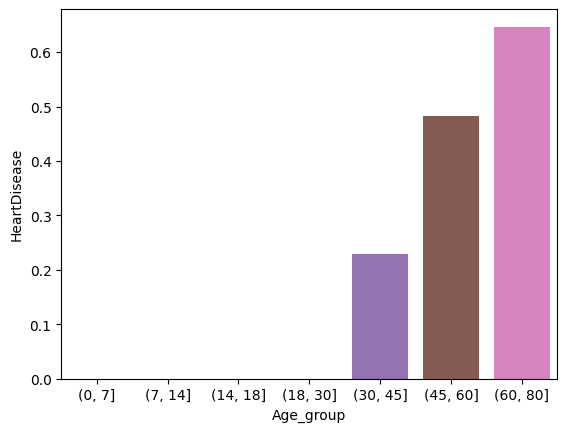

In [660]:
sns.barplot(data=df, x='Age_group', y='HeartDisease', ci=None)
# заболеванию сердечной недостаточности подвержены больше всего
# люди пожилого возраста

/tmp/ipykernel_5812/2694546544.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sex', y='HeartDisease', ci=None)


<AxesSubplot: xlabel='Sex', ylabel='HeartDisease'>

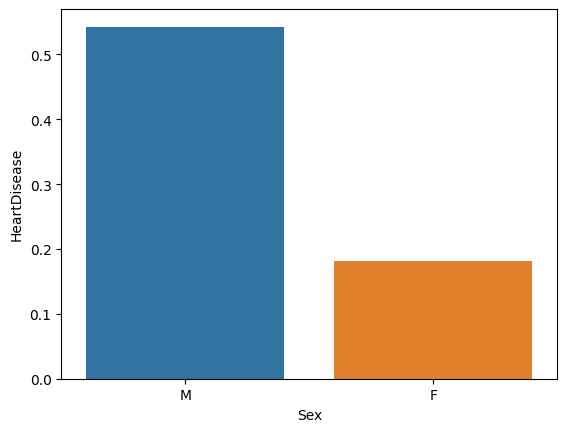

In [661]:
sns.barplot(data=df, x='Sex', y='HeartDisease', ci=None)
# анализируя график, можно увидеть, что мужчины более подвержены заболеванию
# сердечной недостаточности

/tmp/ipykernel_5812/1260002676.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='ChestPainType', y='HeartDisease', ci=None)


<AxesSubplot: xlabel='ChestPainType', ylabel='HeartDisease'>

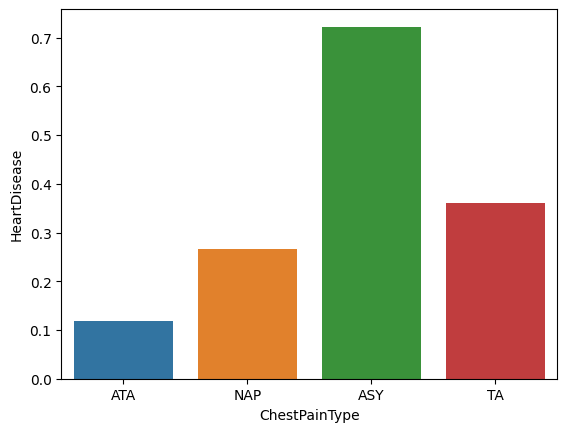

In [662]:
sns.barplot(data=df, x='ChestPainType', y='HeartDisease', ci=None)
# люди с бессимптомной болью в груди более подвержены заболеванию сердечной недостаточности

/tmp/ipykernel_5812/2865844066.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='FastingBS', y='HeartDisease', ci=None)


<AxesSubplot: xlabel='FastingBS', ylabel='HeartDisease'>

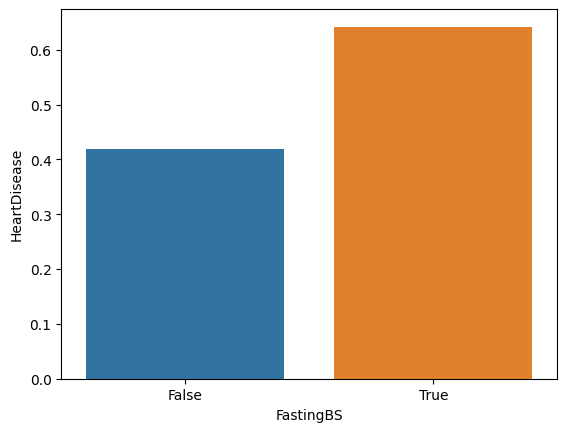

In [663]:
sns.barplot(data=df, x='FastingBS', y='HeartDisease', ci=None)
# люди с бессимптомной болью в груди более подвержены заболеванию сердечной недостаточности

<AxesSubplot: xlabel='ExerciseAngina', ylabel='HeartDisease'>

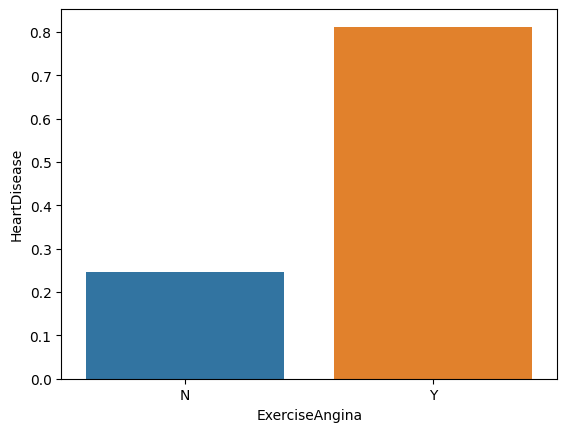

In [664]:
sns.barplot(data=df, x='ExerciseAngina', y='HeartDisease', errorbar=None)
# люди, со стенокардией, вызванной физической нагрузкой

/tmp/ipykernel_5812/1274446002.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='ST_Slope', y='HeartDisease', ci=None)


<AxesSubplot: xlabel='ST_Slope', ylabel='HeartDisease'>

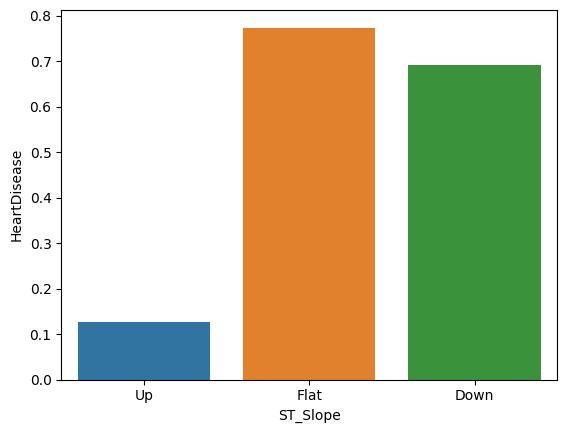

In [665]:
sns.barplot(data=df, x='ST_Slope', y='HeartDisease', ci=None)

In [666]:
# кодирование категориальных признаков
# cut_encoder = { "Sex"          : {'F': 0, 'M': 1},
#                 "ChestPainType": {'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3},
#                 "RestingECG"   : {'Normal': 0, 'ST': 1, 'LVH': 2},
#                 "ExerciseAngina":{'Y': 0, 'N': 1},
#                 "ST_Slope"      :{'Up': 0, 'Flat': 1, 'Down': 2}
#               }
# dt = df.replace(cut_encoder)
# dt.head()

Тут начинается регрессионный анализ.

Нужно разделить датасет на тренировочную и  тестовую выборку.

1.   Рассмотрим логистическую регрессию, так как целевой параметр является бинарным.

  В основе логистической регрессии лежит функция-сигмоида: f(x) = 1/ (1 + exp(-x)).

2. Тесты точностей:
  2.1 Изначальное применение логистической регрессии выдало следующую точность: 0.8293216630196937, 0.8578680203045685 (для тренировчной и тестовой соотвественно)
  2.2 Применение логистической регрессии для нормализованных данных: 0.8336980306345733, 0.8730964467005076
  2.3 Удалим слабокоррелируемые признаки с целевым признаков HeartDisease

Разделим датасет на тренировочную и тестовую(70% / 30%)

Перед использованием логистической регрессии будем использовать OneHotEncoder

In [667]:
df = df.drop(columns=['Age_group'])
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,False,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,False,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,False,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,False,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,False,Normal,122,N,0.0,Up,0


In [668]:
df_reg = df.copy()
df_reg['FastingBS'] = df_reg['FastingBS'].astype(float)


In [669]:
df_reg.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0.0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0.0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0.0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0.0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0.0,Normal,122,N,0.0,Up,0


In [670]:
# Split dataset into features and target
X = df_reg.drop("HeartDisease", axis=1)
y = df_reg["HeartDisease"]

Логистическая регрессия с использованием OrdinalEncoder + MinMaxScaler: Полученная точность - 0.8872180451127819

In [671]:
X = df_reg.drop("HeartDisease", axis=1)
y = df_reg["HeartDisease"]

encoder = OrdinalEncoder()
encoder.fit(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])
X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] = encoder.transform(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

In [672]:
from sklearn.preprocessing import MinMaxScaler 
scaler_mm = MinMaxScaler()
X = pd.DataFrame(scaler_mm.fit_transform(X), columns=X.columns)
X.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.181818,1.0,0.333333,0.637681,0.691120,0.0,0.5,0.807018,0.0,0.028571,1.0
1,0.386364,0.0,0.666667,0.927536,0.270270,0.0,0.5,0.666667,0.0,0.314286,0.5
2,0.113636,1.0,0.333333,0.492754,0.667954,0.0,1.0,0.157895,0.0,0.028571,1.0
3,0.363636,0.0,0.000000,0.608696,0.401544,0.0,0.5,0.245614,1.0,0.457143,0.5
4,0.500000,1.0,0.666667,0.782609,0.328185,0.0,0.5,0.368421,0.0,0.028571,1.0


In [673]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
log_reg.score(X_test, y_test)


0.8872180451127819

In [674]:
from sklearn.metrics import classification_report

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        71
           1       0.86      0.90      0.88        62

    accuracy                           0.89       133
   macro avg       0.89      0.89      0.89       133
weighted avg       0.89      0.89      0.89       133



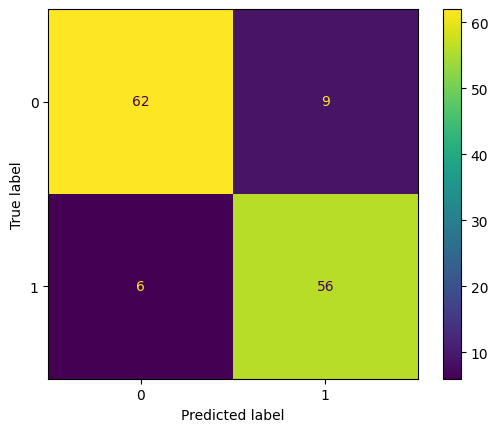

In [675]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()


Логистическая регрессия с использованием OrdinalEncoder + StandardScaller: 

In [676]:
from sklearn.preprocessing import StandardScaler 
X = df_reg.drop("HeartDisease", axis=1)
y = df_reg["HeartDisease"]

encoder = OrdinalEncoder()
encoder.fit(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])
X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] = encoder.transform(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

scaler_s = StandardScaler()
X = pd.DataFrame(scaler_s.fit_transform(X), columns=X.columns)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.390838,0.563996,0.137075,0.614725,1.042490,-0.443566,0.10924,1.300431,-0.765588,-0.869717,0.967259
1,-0.405544,-1.773062,1.181684,1.992092,-1.254319,-0.443566,0.10924,0.639436,-0.765588,0.218455,-0.784907
2,-1.719269,0.563996,0.137075,-0.073958,0.916060,-0.443566,1.71871,-1.756672,-0.765588,-0.869717,0.967259
3,-0.515021,-1.773062,-0.907533,0.476989,-0.537883,-0.443566,0.10924,-1.343550,1.306186,0.762541,-0.784907
4,0.141841,0.563996,1.181684,1.303409,-0.938244,-0.443566,0.10924,-0.765179,-0.765588,-0.869717,0.967259


In [677]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
log_reg.score(X_test, y_test)


0.8796992481203008

In [678]:
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        71
           1       0.85      0.90      0.88        62

    accuracy                           0.88       133
   macro avg       0.88      0.88      0.88       133
weighted avg       0.88      0.88      0.88       133



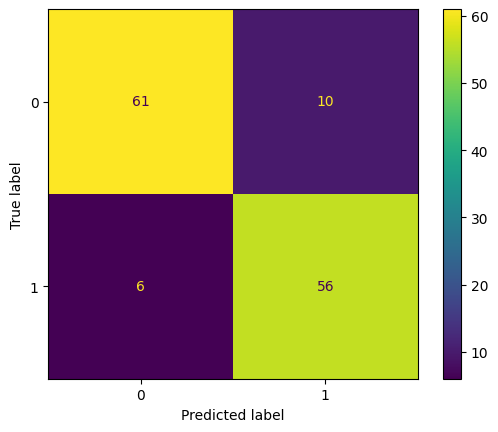

In [679]:
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()

Логистическая регрессия с использованием OneHotEncoder + StandradScaller: 

In [680]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             663 non-null    float64
 1   Sex             663 non-null    float64
 2   ChestPainType   663 non-null    float64
 3   RestingBP       663 non-null    float64
 4   Cholesterol     663 non-null    float64
 5   FastingBS       663 non-null    float64
 6   RestingECG      663 non-null    float64
 7   MaxHR           663 non-null    float64
 8   ExerciseAngina  663 non-null    float64
 9   Oldpeak         663 non-null    float64
 10  ST_Slope        663 non-null    float64
dtypes: float64(11)
memory usage: 57.1 KB


In [681]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             663 non-null    int64  
 1   Sex             663 non-null    object 
 2   ChestPainType   663 non-null    object 
 3   RestingBP       663 non-null    int64  
 4   Cholesterol     663 non-null    int64  
 5   FastingBS       663 non-null    float64
 6   RestingECG      663 non-null    object 
 7   MaxHR           663 non-null    int64  
 8   ExerciseAngina  663 non-null    object 
 9   Oldpeak         663 non-null    float64
 10  ST_Slope        663 non-null    object 
 11  HeartDisease    663 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 67.3+ KB


In [682]:
from sklearn.preprocessing import OneHotEncoder
X = df_reg.drop("HeartDisease", axis=1)
y = df_reg["HeartDisease"]

encoder = OneHotEncoder()
encoded = encoder.fit_transform(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]).toarray()
feature_labels = np.concatenate(encoder.categories_)
X_hotEnc = pd.DataFrame(encoded, columns=feature_labels)
X = X.reset_index(drop=True)
X_hotEnc = X_hotEnc.reset_index(drop=True)
X = pd.concat([X.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1), X_hotEnc], axis=1)
scaler_s = StandardScaler()
X = pd.DataFrame(scaler_s.fit_transform(X), columns=X.columns)

In [683]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)


0.8947368421052632

In [684]:
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        71
           1       0.86      0.92      0.89        62

    accuracy                           0.89       133
   macro avg       0.89      0.90      0.89       133
weighted avg       0.90      0.89      0.89       133



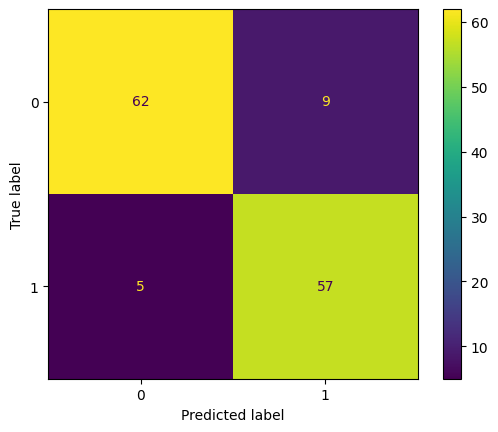

In [685]:
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()

Логистическая регрессия с использованием OneHotEncoder + MinMAxScaller: 

In [686]:
X = df_reg.drop("HeartDisease", axis=1)
y = df_reg["HeartDisease"]

encoder = OneHotEncoder()
encoded = encoder.fit_transform(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]).toarray()
feature_labels = np.concatenate(encoder.categories_)
X_hotEnc = pd.DataFrame(encoded, columns=feature_labels)
X = X.reset_index(drop=True)
X_hotEnc = X_hotEnc.reset_index(drop=True)
X = pd.concat([X.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1), X_hotEnc], axis=1)

scaler_s = StandardScaler()
X = pd.DataFrame(scaler_s.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)


0.8947368421052632

In [687]:
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        71
           1       0.86      0.92      0.89        62

    accuracy                           0.89       133
   macro avg       0.89      0.90      0.89       133
weighted avg       0.90      0.89      0.89       133



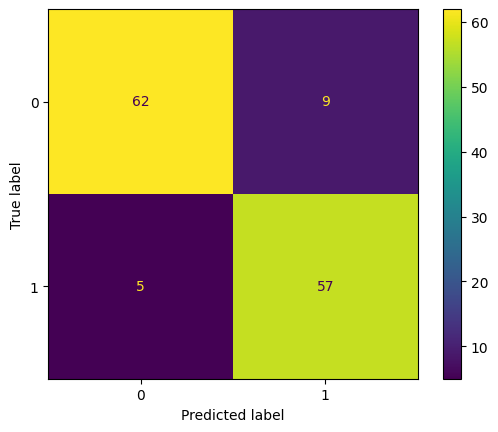

In [688]:
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()

In [689]:
from sklearn.model_selection import GridSearchCV

grid = {"C": np.logspace(-3,3,20), 
        "penalty": ["l2"],
        "max_iter": [100, 500, 1000]
} 

logreg = LogisticRegression(max_iter=1000)
grid_logreg = GridSearchCV(logreg, grid, cv=10)

grid_logreg.fit(X_train,y_train)
grid_logreg.score(X_test, y_test)


0.9097744360902256

In [690]:
y_pred = grid_logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        71
           1       0.89      0.92      0.90        62

    accuracy                           0.91       133
   macro avg       0.91      0.91      0.91       133
weighted avg       0.91      0.91      0.91       133



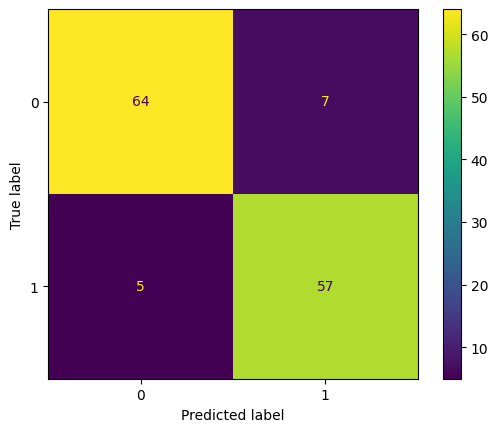

In [691]:
y_pred = grid_logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=grid_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_logreg.classes_)
disp.plot()

Данная нормализация дает + 0.01-0.02 к

Дерево решений

In [692]:
df_DT = df.copy()
df_DT['FastingBS'] = df_DT['FastingBS'].astype(float)


Деревья решений : 

In [693]:
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier

X = df_DT.drop("HeartDisease", axis=1)
y = df_DT["HeartDisease"]


encoder = OrdinalEncoder()
encoder.fit(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])
X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] = encoder.transform(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])



In [694]:
# Производить нормализацию не нужно 
# scaler_mm = MinMaxScaler()
# X = pd.DataFrame(scaler_mm.fit_transform(X), columns=X.columns)
X.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1.0,1.0,140,289,0.0,1.0,172,0.0,0.0,2.0
1,49,0.0,2.0,160,180,0.0,1.0,156,0.0,1.0,1.0
2,37,1.0,1.0,130,283,0.0,2.0,98,0.0,0.0,2.0
3,48,0.0,0.0,138,214,0.0,1.0,108,1.0,1.5,1.0
4,54,1.0,2.0,150,195,0.0,1.0,122,0.0,0.0,2.0


In [695]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtc = DecisionTreeClassifier(max_depth=3,random_state=8)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        71
           1       0.80      0.92      0.86        62

    accuracy                           0.86       133
   macro avg       0.86      0.86      0.86       133
weighted avg       0.87      0.86      0.86       133



In [696]:
dtc.score(X_test, y_test)

0.8571428571428571

In [697]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 15),
    'min_samples_leaf': range(1, 10)
}

random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, n_iter=100, cv=3)
dtc_random = random_search.fit(X_train, y_train)
print(random_search.best_params_)
dtc_random.score(X_test, y_test)

{'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 4}


0.8646616541353384

In [698]:
y_pred = dtc_random.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        71
           1       0.81      0.92      0.86        62

    accuracy                           0.86       133
   macro avg       0.87      0.87      0.86       133
weighted avg       0.87      0.86      0.86       133



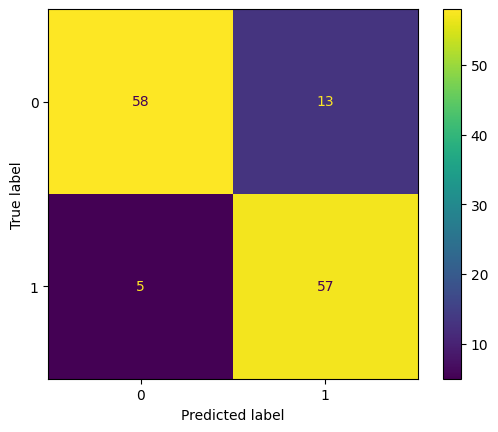

In [699]:
cm = confusion_matrix(y_test, y_pred, labels=dtc_random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_random.classes_)
disp.plot()


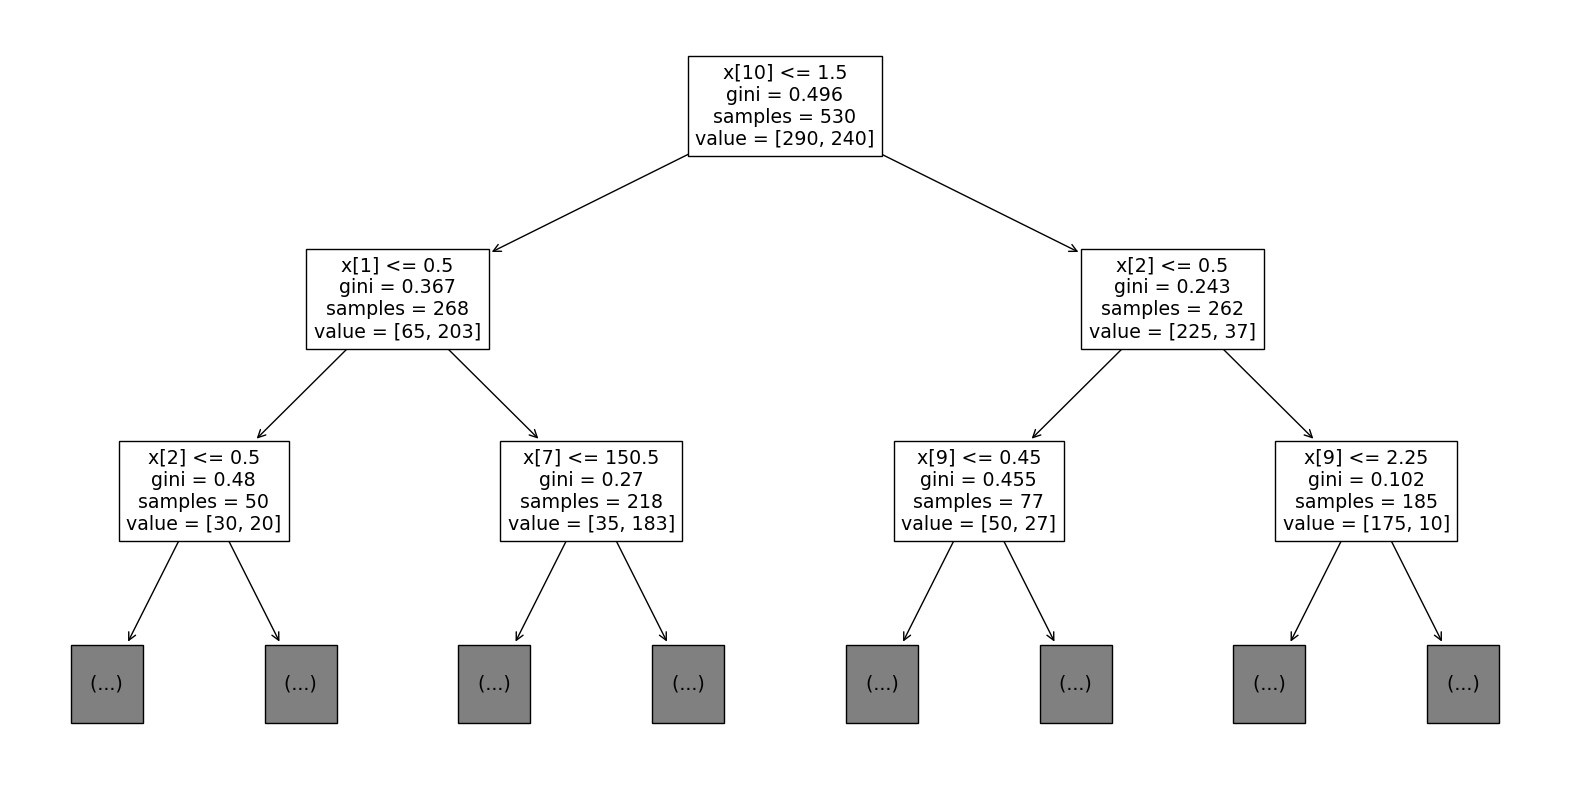

In [700]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(dtc_random.best_estimator_,max_depth=2)
plt.show()

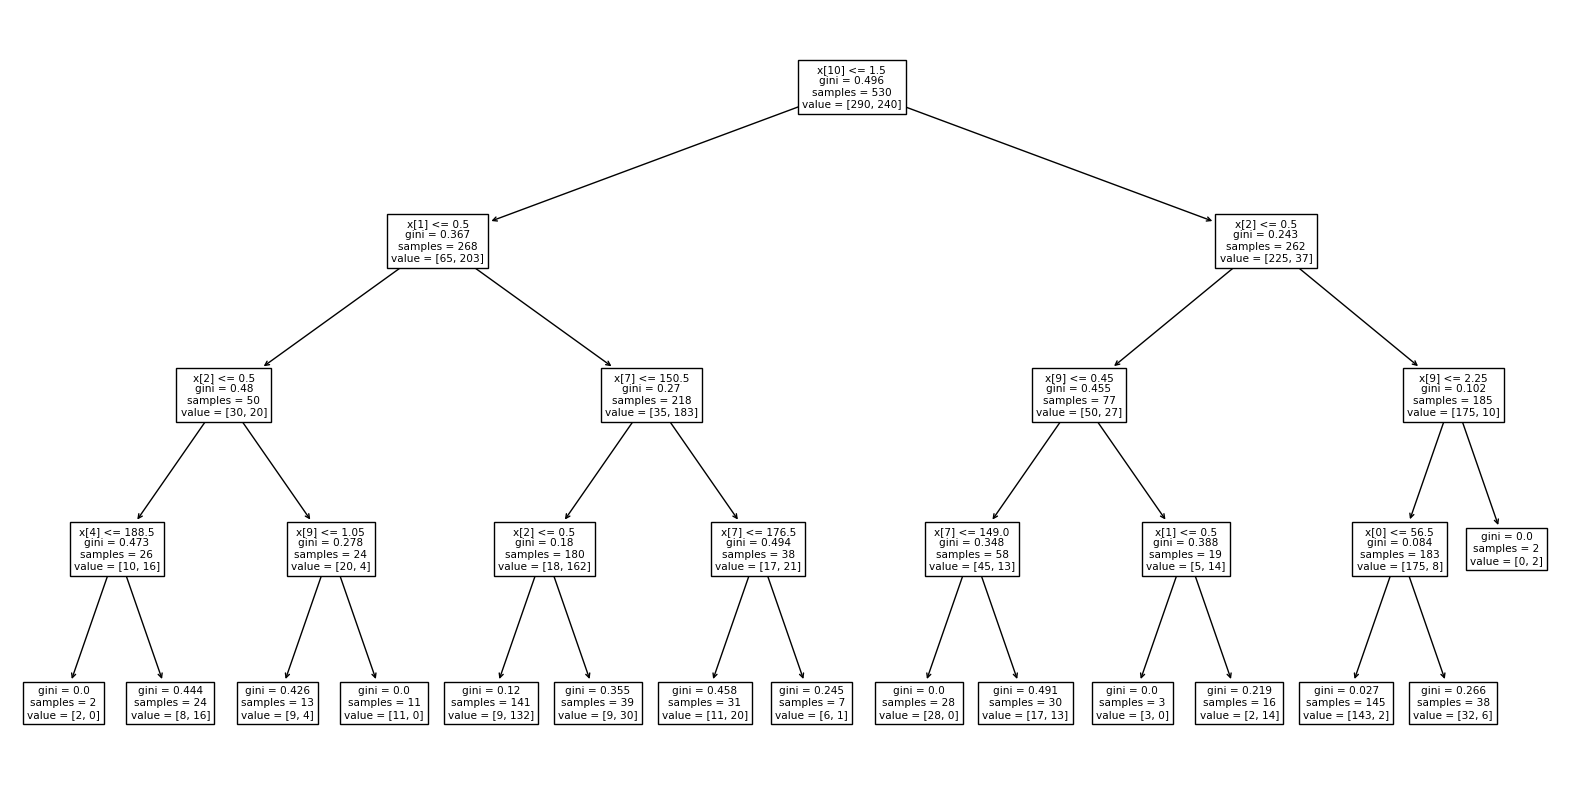

In [701]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dtc_random.best_estimator_)
plt.show()

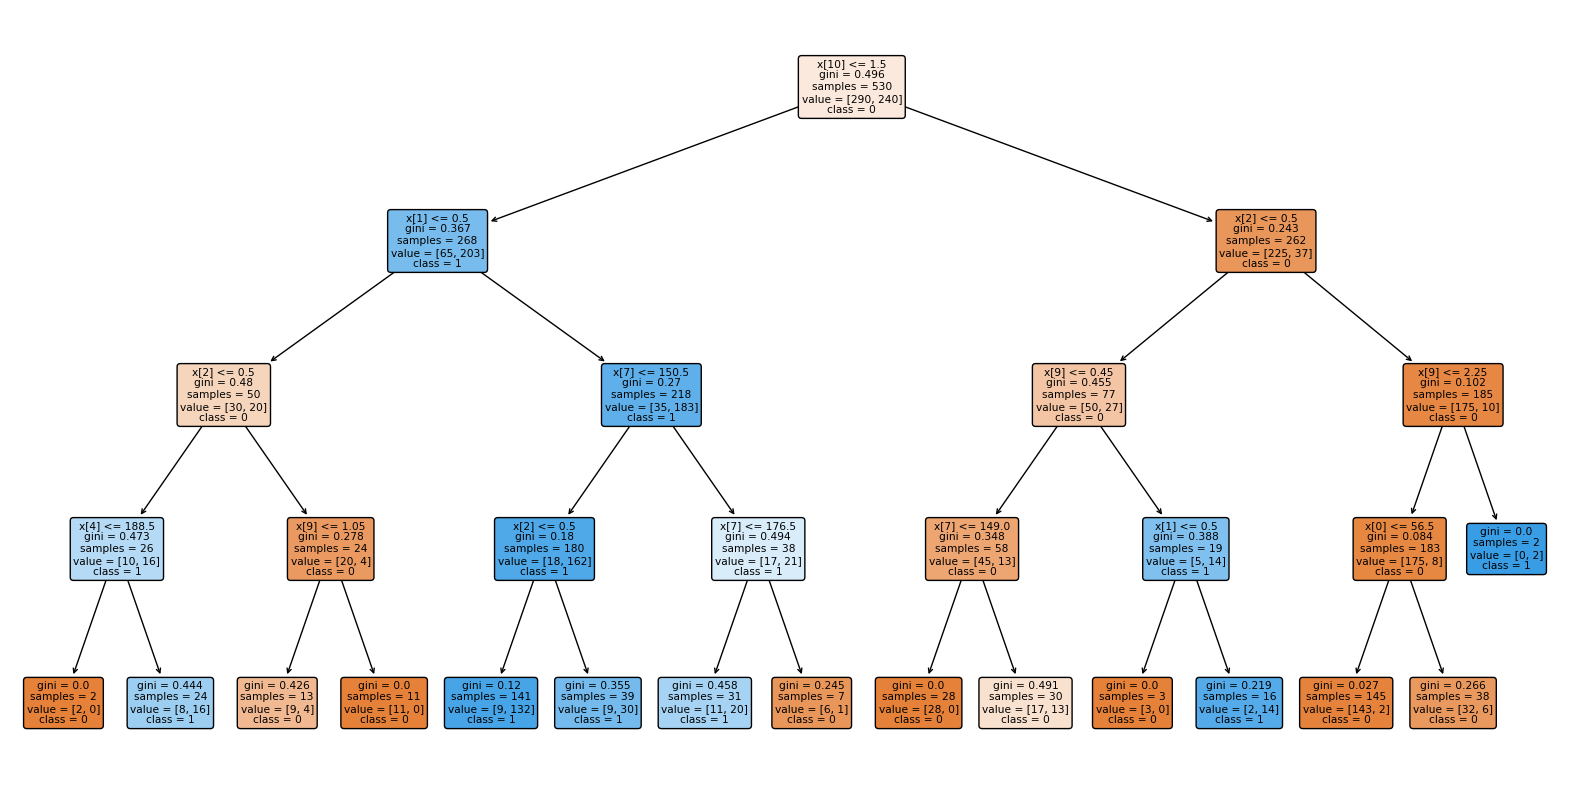

In [702]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dtc_random.best_estimator_, class_names=dtc_random.best_estimator_.classes_.astype(str).tolist(),rounded=True, filled=True)
plt.show()


Градиентный спуск catBoost(добавть к ансамблевым мтодам)

In [703]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(max_depth=11, random_state=42,verbose=False)
cbc.fit(X_train, y_train)
y_pred_cbc = cbc.predict(X_test)
print(classification_report(y_test, y_pred_cbc))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        71
           1       0.86      0.90      0.88        62

    accuracy                           0.89       133
   macro avg       0.89      0.89      0.89       133
weighted avg       0.89      0.89      0.89       133



КНН

Попытка сделать кнн без нормализации.......

In [704]:
df_knn = df.copy()
df_knn['FastingBS'] = df_knn['FastingBS'].astype(float)
X = df_reg.drop("HeartDisease", axis=1)
y = df_reg["HeartDisease"]

encoder = OrdinalEncoder()
encoder.fit(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])
X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] = encoder.transform(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])
scaler_s = StandardScaler()
X = pd.DataFrame(scaler_s.fit_transform(X), columns=X.columns)


In [705]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train, y_train)
knc.score(X_test, y_test)


0.9097744360902256

In [706]:
y_pred = knc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        71
           1       0.90      0.90      0.90        62

    accuracy                           0.91       133
   macro avg       0.91      0.91      0.91       133
weighted avg       0.91      0.91      0.91       133



Данный результат для knn является лучшим, поэтому график тут

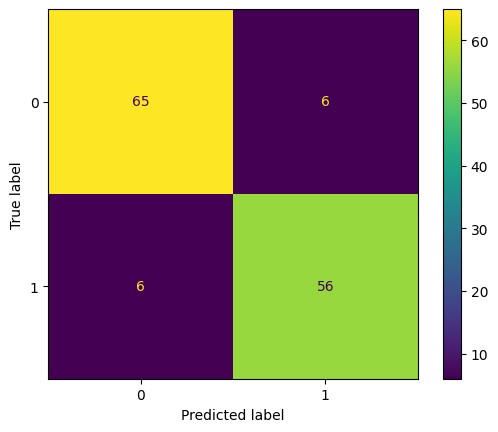

In [707]:
cm = confusion_matrix(y_test, y_pred, labels=knc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knc.classes_)
disp.plot()

In [708]:
X = df_reg.drop("HeartDisease", axis=1)
y = df_reg["HeartDisease"]
encoder = OrdinalEncoder()
encoder.fit(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])
X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] = encoder.transform(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

scaler_mm = MinMaxScaler()
X = pd.DataFrame(scaler_mm.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train, y_train)
knc.score(X_test, y_test)

0.8721804511278195

In [709]:
y_pred = knc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        71
           1       0.87      0.85      0.86        62

    accuracy                           0.87       133
   macro avg       0.87      0.87      0.87       133
weighted avg       0.87      0.87      0.87       133



knn с standatdScaler работает лучше 

StandardScaler + OnHot Encoder

In [710]:
X = df_reg.drop("HeartDisease", axis=1)
y = df_reg["HeartDisease"]

encoder = OneHotEncoder()
encoded = encoder.fit_transform(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]).toarray()
feature_labels = np.concatenate(encoder.categories_)
X_hotEnc = pd.DataFrame(encoded, columns=feature_labels)
X = X.reset_index(drop=True)
X_hotEnc = X_hotEnc.reset_index(drop=True)
X = pd.concat([X.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1), X_hotEnc], axis=1)
scaler_s = StandardScaler()
X = pd.DataFrame(scaler_s.fit_transform(X), columns=X.columns)


In [711]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train, y_train)
knc.score(X_test, y_test)

0.9022556390977443

In [712]:
y_pred = knc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91        71
           1       0.89      0.90      0.90        62

    accuracy                           0.90       133
   macro avg       0.90      0.90      0.90       133
weighted avg       0.90      0.90      0.90       133



OneHot и Ordinal выдают примерно один и тот же результат( в связке StandardScaler)

Ансамблевые методы
Возьмем OneHotEncoder и StandardScaler, так как при ним чаще всего получался более точный результат 

In [713]:
df_ansMethod = df.copy()
df_ansMethod['FastingBS'] = df_ansMethod['FastingBS'].astype(float)

X = df_ansMethod.drop("HeartDisease", axis=1)
y = df_ansMethod["HeartDisease"]

encoder = OneHotEncoder()
encoded = encoder.fit_transform(X[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]).toarray()
feature_labels = np.concatenate(encoder.categories_)
X_hotEnc = pd.DataFrame(encoded, columns=feature_labels)
X = X.reset_index(drop=True)
X_hotEnc = X_hotEnc.reset_index(drop=True)
X = pd.concat([X.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1), X_hotEnc], axis=1)
scaler_s = StandardScaler()
X = pd.DataFrame(scaler_s.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


К каждому алгоритму нужно в отчете написать че он и как делает(желательно пройтись по основным параметрам)

In [714]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from catboost import CatBoostClassifier

rfs = RandomForestClassifier(n_estimators=100 ,max_depth=5,max_features='sqrt')
rfs.fit(X_train, y_train)
rfs.score(X_test, y_test)
y_pred_rfs = rfs.predict(X_test)
print(classification_report(y_test, y_pred_rfs))


              precision    recall  f1-score   support

           0       0.95      0.89      0.92        71
           1       0.88      0.95      0.91        62

    accuracy                           0.92       133
   macro avg       0.92      0.92      0.92       133
weighted avg       0.92      0.92      0.92       133



In [715]:
rfs.score(X_test, y_test)


0.9172932330827067

In [716]:
from random import randint


param_dist = {
    'n_estimators': randint(100, 1000),  # Случайное целое число от 100 до 1000
    'max_depth': list(range(5, 20)),  # Глубина от 5 до 20 или None
    'max_features': ['sqrt', 'log2', None],  # Различные значения для max_features
    'min_samples_split': randint(2, 20),  # Случайное целое число от 2 до 20
    'min_samples_leaf': randint(1, 20)  # Случайное целое число от 1 до 20
}
rfs = RandomForestClassifier()


rfs_random = RandomizedSearchCV(rfs, param_distributions=param_dist, n_iter=1000, cv=500)
random_search.fit(X_train, y_train)
random_search.score(X_test, y_test)
y_pred_rfs = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rfs))


              precision    recall  f1-score   support

           0       0.88      0.89      0.88        71
           1       0.87      0.85      0.86        62

    accuracy                           0.87       133
   macro avg       0.87      0.87      0.87       133
weighted avg       0.87      0.87      0.87       133



Я на рандом лучше натыкал чем RandomizedSearchCV

In [717]:
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
abc.fit(X_train, y_train)
y_pred_abc = abc.predict(X_test)
print(classification_report(y_test, y_pred_abc))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        71
           1       0.86      0.79      0.82        62

    accuracy                           0.84       133
   macro avg       0.84      0.84      0.84       133
weighted avg       0.84      0.84      0.84       133



In [718]:
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=7, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        71
           1       0.84      0.84      0.84        62

    accuracy                           0.85       133
   macro avg       0.85      0.85      0.85       133
weighted avg       0.85      0.85      0.85       133



In [719]:
hgbc = HistGradientBoostingClassifier(max_iter=10, max_depth=11, random_state=42)
hgbc.fit(X_train, y_train)
y_pred_hgbc = hgbc.predict(X_test)
print(classification_report(y_test, y_pred_hgbc))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        71
           1       0.83      0.87      0.85        62

    accuracy                           0.86       133
   macro avg       0.86      0.86      0.86       133
weighted avg       0.86      0.86      0.86       133



In [720]:
from sklearn.ensemble import VotingClassifier
classifiers = [('rf', rfs), ('abc', abc), ('gbc', gbc), ('hgbc', hgbc)]
vc = VotingClassifier(classifiers,voting='hard')
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('abc',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=42)),
                             ('gbc',
                              GradientBoostingClassifier(max_depth=7,
                                                         random_state=42)),
                             ('hgbc',
                              HistGradientBoostingClassifier(max_depth=11,
                                                             max_iter=10,
                                                             random_state=42))])

In [721]:
y_pred_vc = vc.predict(X_test)
print(classification_report(y_test, y_pred_vc))


              precision    recall  f1-score   support

           0       0.87      0.87      0.87        71
           1       0.85      0.85      0.85        62

    accuracy                           0.86       133
   macro avg       0.86      0.86      0.86       133
weighted avg       0.86      0.86      0.86       133



бонус: catboost от яндекса

In [722]:
cbc = CatBoostClassifier(max_depth=10, random_state=42,verbose=False)
cbc.fit(X_train, y_train)
y_pred_cbc = cbc.predict(X_test)
print(classification_report(y_test, y_pred_cbc))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        71
           1       0.88      0.90      0.89        62

    accuracy                           0.89       133
   macro avg       0.89      0.90      0.89       133
weighted avg       0.90      0.89      0.89       133



Так: Тут у каждого из методов я рандомно вбил параметры. По-хорошему сделать подбор параметров 
Плюс какая-то проблема с VotingClassifier - он должен был выбрать лучший рез из нескольких, в итоге выбрал не то(думаю его удалить)

и еще походу scaler не роляет

Лучший рез - 91.7%